In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [7]:
df_p=pd.read_csv('PFE_stock_data.csv')
df_j=pd.read_csv('JNJ_stock_data.csv')
df_l=pd.read_csv('LLY_stock_data.csv')

In [8]:
df_p.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-12-11 00:00:00-05:00,29.388385,29.541570,29.258179,29.273497,15569372,0.0,0.0
1,2019-12-12 00:00:00-05:00,29.235196,29.579861,29.235196,29.518587,13414469,0.0,0.0
2,2019-12-13 00:00:00-05:00,29.503276,29.625823,29.158612,29.357750,16678496,0.0,0.0
3,2019-12-16 00:00:00-05:00,29.641136,30.177279,29.610497,29.978138,24187824,0.0,0.0
4,2019-12-17 00:00:00-05:00,30.207917,30.207917,29.748365,29.794321,29038016,0.0,0.0


In [9]:
# lets remove timezone as we wont need that 
df_p['Date']=df_p['Date'].str.slice(0,10)
df_j['Date']=df_p['Date'].str.slice(0,10)
df_l['Date']=df_p['Date'].str.slice(0,10)

In [13]:
# converting date column to date time series data

In [16]:
df_p['Date']=pd.to_datetime(df_p['Date'])
df_j['Date']=pd.to_datetime(df_j['Date'])
df_l['Date']=pd.to_datetime(df_l['Date'])

In [17]:
df_p['Date'].dt.day_name()

0       Wednesday
1        Thursday
2          Friday
3          Monday
4         Tuesday
          ...    
1253    Wednesday
1254     Thursday
1255       Friday
1256       Monday
1257      Tuesday
Name: Date, Length: 1258, dtype: object

<font size='3'> Converted to date time series data

In [18]:
#lets check for null values

In [19]:
df_p.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [20]:
df_l.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [21]:
df_j.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [24]:
df_p['Dividends'].unique()

array([0.      , 0.360531, 0.39    , 0.4     , 0.41    , 0.42    ])

In [25]:
df_p['Stock Splits'].unique()

array([0.   , 1.054])

<font size='3'> Lets get rid of Stock Splits and Dividends columns as we wont need them!

In [28]:
df_p.drop(columns=['Stock Splits','Dividends'],inplace=True)

In [29]:
df_j.drop(columns=['Stock Splits','Dividends'],inplace=True)
df_l.drop(columns=['Stock Splits','Dividends'],inplace=True)

In [30]:
df_p.shape,df_j.shape,df_l.shape

((1258, 6), (1258, 6), (1258, 6))

In [93]:
# lets make Date column index so accessing and operations become easier

In [33]:
df_p.set_index('Date',inplace=True)
df_l.set_index('Date',inplace=True)
df_j.set_index('Date',inplace=True)

In [34]:
df_p.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-11,29.388385,29.541570,29.258179,29.273497,15569372
2019-12-12,29.235196,29.579861,29.235196,29.518587,13414469
2019-12-13,29.503276,29.625823,29.158612,29.357750,16678496
2019-12-16,29.641136,30.177279,29.610497,29.978138,24187824
2019-12-17,30.207917,30.207917,29.748365,29.794321,29038016


In [37]:
df_p.info(),df_j.info(),df_l.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-12-11 to 2024-12-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-12-11 to 2024-12-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-12-11 to 2024-12-10
Data columns (total 5 columns):
 #   Col

(None, None, None)

In [67]:
df_p.sort_index(inplace=True)
df_j.sort_index(inplace=True)
df_l.sort_index(inplace=True)

<h2> Visualizing Closing stock prices</h2>

<h3> For Pfizer (PFE)</h3>

<Axes: xlabel='Date'>

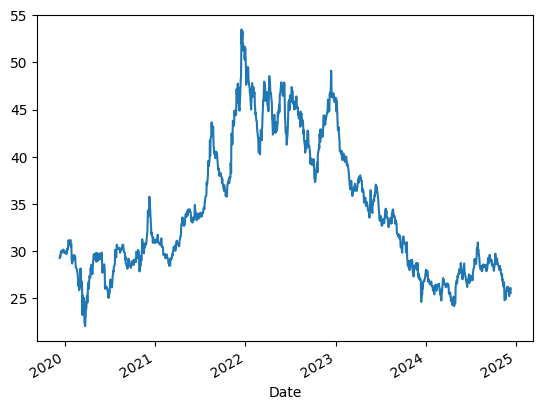

In [97]:
df_p['Close'].plot()

<font size='4'> From above graph we can see that there has been spike in Closing price between 2021 till mid 2023.

In [115]:
filter=df_p.resample('Y').mean()

In [117]:
filter['Close']

Date
2019-12-31    29.850125
2020-12-31    28.848558
2021-12-31    36.256572
2022-12-31    44.240967
2023-12-31    33.949353
2024-12-31    27.208212
Freq: A-DEC, Name: Close, dtype: float64

<font size='4'> From above resample we can see that the average increase in closing price was from year 2021 till 2023.

In [129]:
filter1=df_p.loc['2021':'2023']# accesing value for only 2021 till 2023.
filter1

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,30.980313,31.039130,30.476159,30.929899,33565700
2021-01-05,30.854268,31.400434,30.753435,31.249187,29909400
2021-01-06,30.946706,31.492872,30.896290,30.980314,34962500
2021-01-07,31.123160,31.215588,30.812262,31.139965,27809500
2021-01-08,31.223989,31.534883,31.005523,31.198782,33462400
...,...,...,...,...,...
2023-12-22,26.801685,27.131523,26.556662,26.763988,35087200
2023-12-26,26.792259,26.886499,26.622628,26.773411,30119100
2023-12-27,26.829955,27.074977,26.679172,26.961891,35000700


In [123]:
filter1[filter1['Close']==filter1['Close'].max()]

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-16,50.956152,53.636676,50.423539,53.479511,75183600


<Axes: xlabel='Date'>

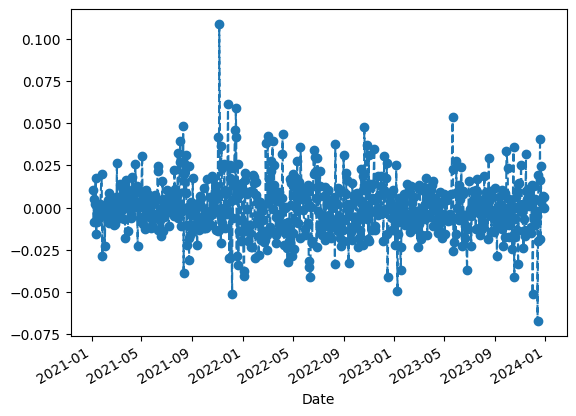

In [292]:
filter1['Close'].pct_change().plot(linestyle='--',marker='o')

<Axes: xlabel='Date'>

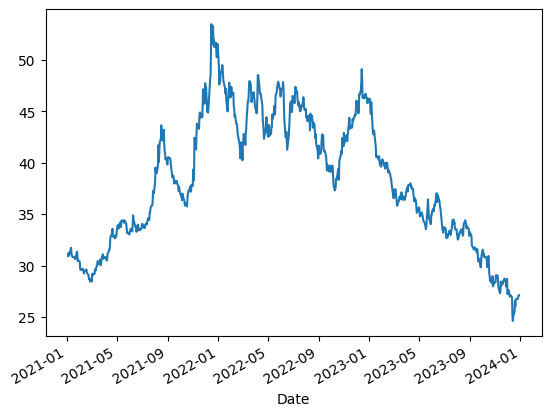

In [413]:
filter1['Close'].plot() #closing price between 2021 and 2023

<font size='4'> In April 2020 pfizer partnership with BioNTech to develop the covid 19 vaccine and they released there 1st world wide covid 19 vaccine in 11 DEC 2020 this could be the potential reason behind the spike in price in early 2021.

In [128]:
filter3=filter1.resample('M').mean()# resampling on Months for 2021 till 2023.

<Axes: xlabel='Date'>

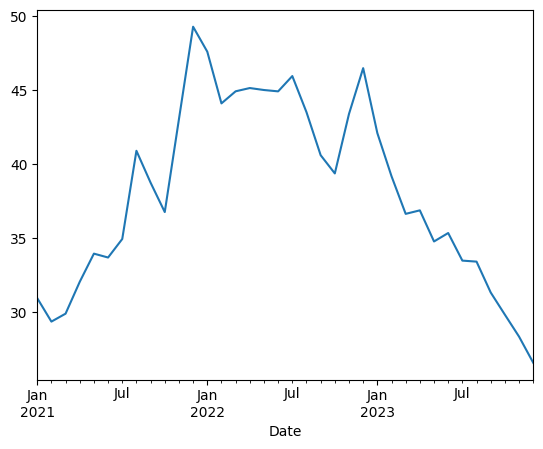

In [127]:
filter3['Close'].plot()

<font size='4'> From above graph we can see that the most increment in average closing price for pfizer was between july 2021 - jan 2022.<br>On 23 August 2021, the Pfizer–BioNTech vaccine became the first COVID-19 vaccine to be approved in the US by the Food and Drug Administration (FDA) This could be the potential reason for rise in average closing price.

<h3> For J&J</h3>

<Axes: xlabel='Date'>

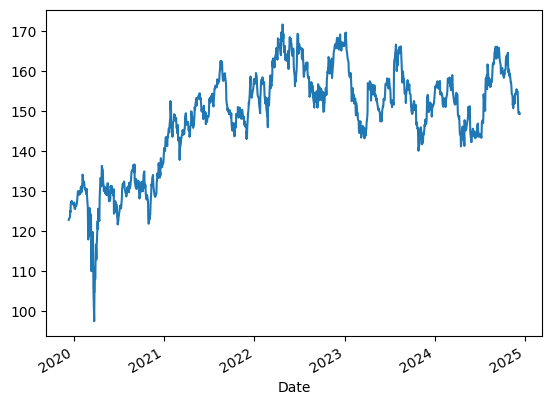

In [70]:
df_j['Close'].plot()

<font size='4'> By looking at above graph for J&J we see that there a massive decrement in stock closing prices in 2020 lets find in which month that decrement start and the potential reason.

In [71]:
df_j[df_j['Close']==df_j['Close'].min()]

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-23,102.49577,103.862378,95.627681,97.362221,20815200


In [131]:
# lets find out from which Month in 2020 the closing price for J&J started to decrease
filt=df_j.loc['2020']

<Axes: xlabel='Date'>

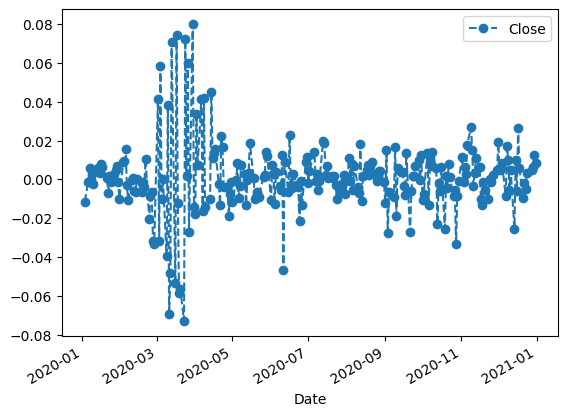

In [290]:
filt.pct_change()['Close'].plot(legend=True,marker='o',linestyle='--')

<font size='4'> So by looking at 2020 closing price graph the decrement in closing price started in month of March(2020-03) the potential reason could be that a Lawsuit was Filed against J&J earlier that month.

In [85]:
# Average percentage decline form previous month
filt1=filt.resample('M').mean()

<Axes: xlabel='Date'>

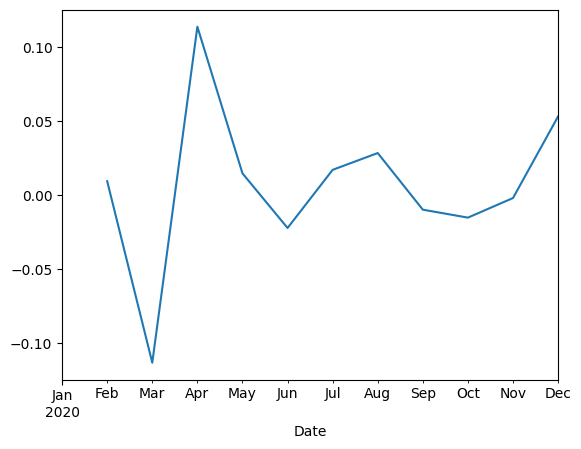

In [87]:
filt1.pct_change()['Close'].plot()

In [88]:
filt1['Close'].pct_change()

Date
2020-01-31         NaN
2020-02-29    0.009283
2020-03-31   -0.113368
2020-04-30    0.113691
2020-05-31    0.014609
2020-06-30   -0.022319
2020-07-31    0.016974
2020-08-31    0.028325
2020-09-30   -0.009945
2020-10-31   -0.015314
2020-11-30   -0.002071
2020-12-31    0.053074
Freq: M, Name: Close, dtype: float64

<font size='4'> From the above pct_change() graph we can say that the average Closing price for March had the highest decrease with -0.11% decrease from its previous month.

<h2> Visualizing Daily Growth</h2>

<h3> For Pfizer (PFE)</h3>

In [138]:
df_p1=df_p.copy()

In [198]:
df_p1['Growth']=df_p1['Close']-df_p1['Open']
df_p1['Growth%']=(df_p1['Close']-df_p1['Open'])/df_p1['Open']*100

In [199]:
df_p1.head()

,Open,High,Low,Close,Volume,Growth,Growth%
Date,,,,,,,
2019-12-11,29.388385,29.541570,29.258179,29.273497,15569372,-0.114888,-0.390930
2019-12-12,29.235196,29.579861,29.235196,29.518587,13414469,0.283391,0.969348
2019-12-13,29.503276,29.625823,29.158612,29.357750,16678496,-0.145526,-0.493255
2019-12-16,29.641136,30.177279,29.610497,29.978138,24187824,0.337002,1.136941
2019-12-17,30.207917,30.207917,29.748365,29.794321,29038016,-0.413596,-1.369166


<Axes: xlabel='Date'>

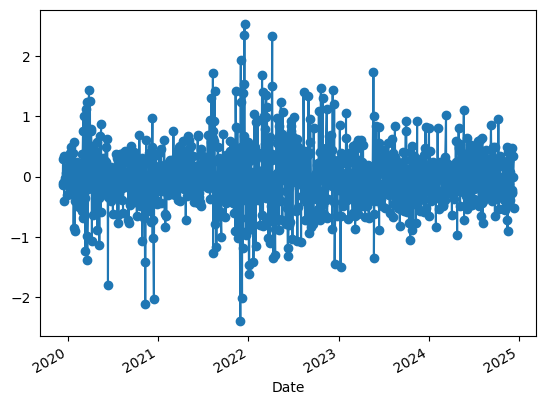

In [181]:
df_p1['Growth'].plot(marker='o')

In [164]:
df_p1.sort_values('Growth',ascending=False)

,Open,High,Low,Close,Volume,Growth,Growth%
Date,,,,,,,
2021-12-16,50.956152,53.636676,50.423539,53.479511,75183600,2.523359,4.952021
2021-12-15,48.991597,51.445103,48.799506,51.340328,75202900,2.348732,4.794152
2022-04-07,46.188108,48.748248,46.188108,48.528305,36305700,2.340197,5.066666
2021-12-01,45.813392,48.170853,45.280779,47.743019,59810400,1.929627,4.211929
2023-05-22,33.896883,35.745301,33.795726,35.634949,85718600,1.738065,5.127508
...,...,...,...,...,...,...,...
2020-06-11,27.819828,27.882344,26.006850,26.022478,63166642,-1.797350,-6.460680
2021-12-06,46.957196,47.053241,44.748165,44.948986,53724000,-2.008210,-4.276681
2020-12-14,34.971532,35.005143,32.828875,32.946510,94809700,-2.025021,-5.790485


<font size='4'> So the highest growth of a day for **pfizer(PFE)** was on 16 Dec 2021. It was also their  highest closing price ever till this day.

<Axes: xlabel='Date'>

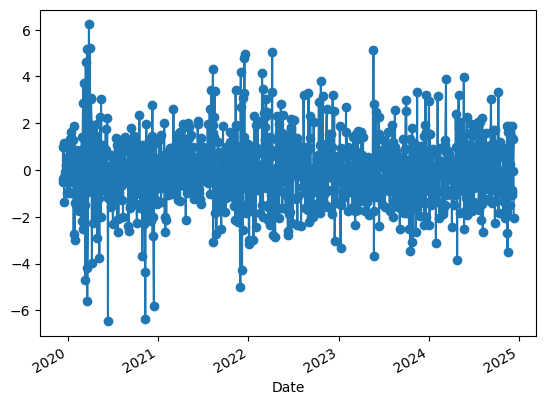

In [172]:
df_p1['Growth%'].plot(marker='o')

In [171]:
df_p1.sort_values('Growth%',ascending=False)

,Open,High,Low,Close,Volume,Growth,Growth%
Date,,,,,,,
2020-03-26,23.127232,24.752095,23.119493,24.566397,43269967,1.439165,6.222816
2020-03-30,24.024780,25.417520,24.024780,25.278246,29943508,1.253466,5.217387
2020-03-18,23.808127,25.231818,23.452205,25.038382,43884976,1.230254,5.167372
2023-05-22,33.896883,35.745301,33.795726,35.634949,85718600,1.738065,5.127508
2022-04-07,46.188108,48.748248,46.188108,48.528305,36305700,2.340197,5.066666
...,...,...,...,...,...,...,...
2021-11-29,48.153391,48.633614,45.499060,45.752270,72660800,-2.401121,-4.986401
2020-03-19,24.930057,24.953270,23.220082,23.537317,59820929,-1.392740,-5.586589
2020-12-14,34.971532,35.005143,32.828875,32.946510,94809700,-2.025021,-5.790485


<font size='4'> As for highest % Growth that was in was in March 2020 the potential reason could be that **pfizer** announced on 26 March 2020 that due to the unprecedented circumstances surrounding the COVID-19 pandemic including associated delays in the regulatory review process, the proposed transaction involving **Mylan** and **Upjohn**(a division of **Pfizer**) has been postponed.



<h3> For Eli Lilly(LLY)</h3>

In [165]:
df_l1=df_l.copy()

In [166]:
df_l1['Growth']=df_l1['Close']-df_l1['Open']
df_l1['Growth%']=(df_l1['Close']-df_l1['Open'])/df_l1['Open']*100

<Axes: xlabel='Date'>

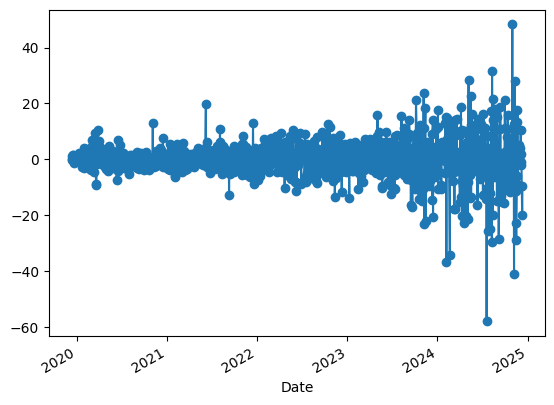

In [200]:
df_l1['Growth'].plot(marker='o')

In [167]:
df_l1.sort_values('Growth',ascending=False)

,Open,High,Low,Close,Volume,Growth,Growth%
Date,,,,,,,
2024-10-30,797.179762,859.077252,767.728537,845.429871,18257200,48.250108,6.052601
2024-08-09,857.380021,905.722287,857.380021,888.963501,6587600,31.583480,3.683720
2024-05-06,734.539582,763.352290,732.509279,763.043762,3398300,28.504180,3.880551
2024-11-08,802.171484,845.869133,799.935197,830.165100,7212900,27.993616,3.489730
2023-11-06,566.350313,592.739052,566.261095,590.239990,3978500,23.889678,4.218180
...,...,...,...,...,...,...,...
2024-08-08,872.334356,875.105916,822.725937,842.734802,9434900,-29.599553,-3.393143
2024-02-20,786.253146,789.617120,749.627695,752.075989,4701100,-34.177157,-4.346839
2024-02-06,737.188619,737.188619,686.618648,700.458374,8187300,-36.730245,-4.982476


<font size='4'> The highest Growth was on 30 Oct 2024 and potential reason could be that  **Eli Lilly and Company** (NYSE: LLY)  announced its financial results for the third quarter of 2024.

<Axes: xlabel='Date'>

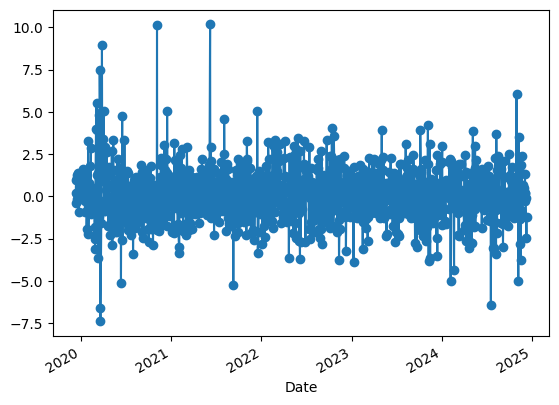

In [190]:
df_l1['Growth%'].plot(marker='o')

In [170]:
df_l1.sort_values('Growth%',ascending=False)

,Open,High,Low,Close,Volume,Growth,Growth%
Date,,,,,,,
2021-06-07,194.777420,224.998339,194.623129,214.574341,17231400,19.796921,10.163869
2020-11-04,128.322310,144.558770,128.322310,141.334305,12211700,13.011995,10.140088
2020-03-26,116.154054,127.883461,114.882193,126.573914,6723600,10.419859,8.970724
2020-03-17,125.499877,135.279078,123.512002,134.911652,8909200,9.411775,7.499429
2024-10-30,797.179762,859.077252,767.728537,845.429871,18257200,48.250108,6.052601
...,...,...,...,...,...,...,...
2020-06-11,143.734503,144.103659,135.404809,136.379761,4547400,-7.354743,-5.116894
2021-09-09,245.034200,245.740416,231.858138,232.177383,4976600,-12.856816,-5.246948
2024-07-18,904.266819,907.098133,834.111141,846.313904,7649600,-57.952915,-6.408829


<font size='4'> Highest % Growth for **Eli Lilly** was on 7 Jun 2021 with 10.16% increase and the potential reason was that FDA (Food and Drug Administration) approved **Biogen's** aducanumab (Aduhelm) in treating Alzheimer's disease and **Eli Lilly** also announced That they are developing their own drug to treat Alzheimer’s.

<font size='4'> There was also a 2nd highest % Growth which is 10.14% increase on 4 November 2020 and the potential reason could be the presidential election that took place on 3 November 2020 in U.S

<h3> For J&J</h3>

In [182]:
df_j1=df_j.copy()

In [185]:
df_j1['Growth']=df_j1['Close']-df_j1['Open']
df_j1['Growth%']=(df_j1['Close']-df_j1['Open'])/df_j1['Open']*100

In [191]:
df_j1

,Open,High,Low,Close,Volume,Growth,Growth%
Date,,,,,,,
2019-12-11,122.676940,123.590948,122.415806,122.720467,6631500,0.043527,0.035481
2019-12-12,123.016467,123.660615,122.502873,123.033867,5012400,0.017400,0.014145
2019-12-13,122.824938,123.434273,122.137251,123.068672,4257200,0.243734,0.198440
2019-12-16,123.373326,124.348274,123.164419,123.425552,5353100,0.052227,0.042332
2019-12-17,124.478856,125.392865,124.061029,124.966324,10722400,0.487468,0.391607
...,...,...,...,...,...,...,...
2024-12-04,151.289993,151.559998,149.750000,150.470001,10333100,-0.819992,-0.542000
2024-12-05,150.000000,150.380005,148.949997,149.520004,7898100,-0.479996,-0.319997
2024-12-06,149.389999,150.050003,148.380005,149.309998,8389600,-0.080002,-0.053552


<Axes: xlabel='Date'>

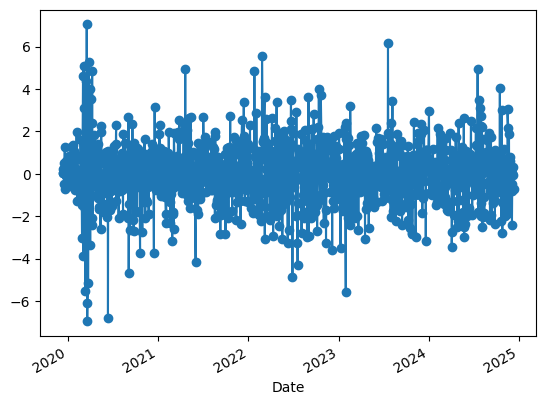

In [289]:
df_j1['Growth'].plot(marker='o')

In [188]:
df_j1.sort_values('Growth',ascending=False)

,Open,High,Low,Close,Volume,Growth,Growth%
Date,,,,,,,
2020-03-17,112.613941,119.814927,111.965673,119.657234,18911800,7.043293,6.254370
2023-07-20,154.600941,161.474636,153.989946,160.749084,21892900,6.148144,3.976783
2022-02-25,147.610349,154.059081,147.333576,153.145737,11340400,5.535388,3.750000
2020-03-26,105.623201,111.343691,105.456753,110.879395,15066800,5.256193,4.976362
2020-03-04,120.612110,125.833268,120.139059,125.693100,10560500,5.080990,4.212669
...,...,...,...,...,...,...,...
2020-03-11,120.971313,121.549497,115.198262,115.461075,17763400,-5.510238,-4.554996
2023-01-30,157.982644,158.556512,151.538413,152.403915,23259100,-5.578729,-3.531229
2020-03-20,111.107178,111.641558,103.485693,105.027512,19785100,-6.079666,-5.471893


<font size='4'> Highest growth for **J&J** was on 17 March 2020 and the potential reason was that **J&J** announced that they hope to begin human clinical trials on a COVID-19 vaccine in early November by its chief scientific officer, Dr. Paul Stoffels on CNBC. This growth seems higher cuz in month of march 2020 J&J has lowest average closing price compared to previous so the growth seems higher due to a decrement in prices earlier that month.

<Axes: xlabel='Date'>

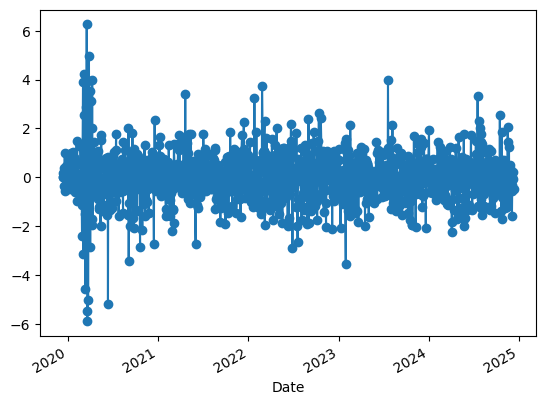

In [287]:
df_j1['Growth%'].plot(marker='o')

In [194]:
df_j1.sort_values('Growth%',ascending=False)

,Open,High,Low,Close,Volume,Growth,Growth%
Date,,,,,,,
2020-03-17,112.613941,119.814927,111.965673,119.657234,18911800,7.043293,6.254370
2020-03-26,105.623201,111.343691,105.456753,110.879395,15066800,5.256193,4.976362
2020-03-04,120.612110,125.833268,120.139059,125.693100,10560500,5.080990,4.212669
2020-04-08,120.673419,126.262508,120.279207,125.500351,10758200,4.826932,3.999996
2023-07-20,154.600941,161.474636,153.989946,160.749084,21892900,6.148144,3.976783
...,...,...,...,...,...,...,...
2020-03-11,120.971313,121.549497,115.198262,115.461075,17763400,-5.510238,-4.554996
2020-03-23,102.495770,103.862378,95.627681,97.362221,20815200,-5.133549,-5.008548
2020-06-11,131.063134,131.583573,124.156252,124.262100,11913300,-6.801034,-5.189128


<font size='4'> The highest % Growth and highest Growth happened on the same day that is 17 March 2020 and the potential reason could be the same as **J&J** was one of the few companies contributing in development of COVID-19 vaccines.This could be reason for positive response from investors.

<h2> Combined Visualization</h2

<font size='4'> Ploting closing price for all 3 companies together

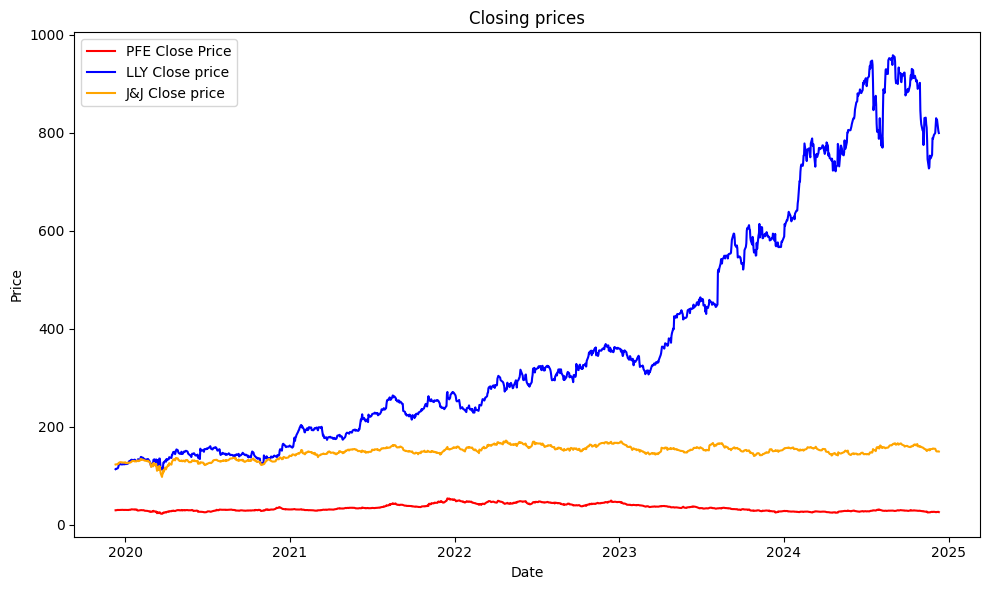

In [414]:
plt.figure(figsize=(10, 6))
plt.plot(df_p.index, df_p['Close'], label='PFE Close Price', color='red')
plt.plot(df_l.index, df_l['Close'], label='LLY Close price', color='blue')
plt.plot(df_j.index, df_j['Close'], label='J&J Close price', color='orange')


# Add title and labels
plt.title('Closing prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<font size='4'> As we can see there is vast difference in price for each stocks for all 3 companies so the above graph cannot be used to draw conclusions.

<font size='4'> Plotting % growth of all 3 companies for each day

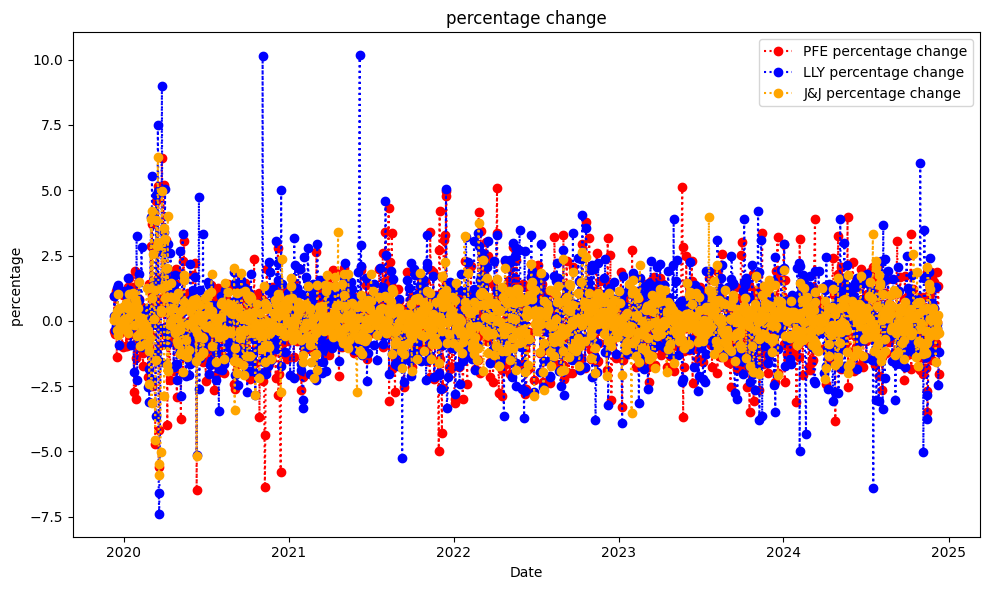

In [411]:
plt.figure(figsize=(10, 6))
plt.plot(df_p1.index, df_p1['Growth%'], label='PFE percentage change', color='red',marker='o',linestyle=':')
plt.plot(df_l1.index, df_l1['Growth%'], label='LLY percentage change', color='blue',marker='o',linestyle=':')
plt.plot(df_j1.index, df_j1['Growth%'], label='J&J percentage change', color='orange',marker='o',linestyle=':')

plt.title('percentage change')
plt.xlabel('Date')
plt.ylabel('percentage ')
plt.legend()
plt.tight_layout()
plt.show()

In [314]:
p=df_p.copy()
j=df_j.copy()
l=df_l.copy()

In [344]:
# Present outstanding shares for each companies
p['Market_Cap']=p['Close']*5666990080
j['Market_Cap']=j['Close']*2407620096
l['Market_Cap']=l['Close']*899315968

<font size='4'> Above outstanding shares values are present shares provided by Yfinance.<br>
Our assumption is a constant number of outstanding shares over a 5 years period.

In [342]:
p

,Open,High,Low,Close,Volume,Market_Cap
Date,,,,,,
2019-12-11,29.388385,29.541570,29.258179,29.273497,15569372,1.658926e+11
2019-12-12,29.235196,29.579861,29.235196,29.518587,13414469,1.672815e+11
2019-12-13,29.503276,29.625823,29.158612,29.357750,16678496,1.663701e+11
2019-12-16,29.641136,30.177279,29.610497,29.978138,24187824,1.698858e+11
2019-12-17,30.207917,30.207917,29.748365,29.794321,29038016,1.688441e+11
...,...,...,...,...,...,...
2024-12-04,25.450001,25.500000,25.180000,25.230000,42541500,1.429782e+11
2024-12-05,25.230000,25.790001,25.139999,25.700001,43647900,1.456416e+11
2024-12-06,25.740000,26.100000,25.590000,25.730000,31830700,1.458117e+11


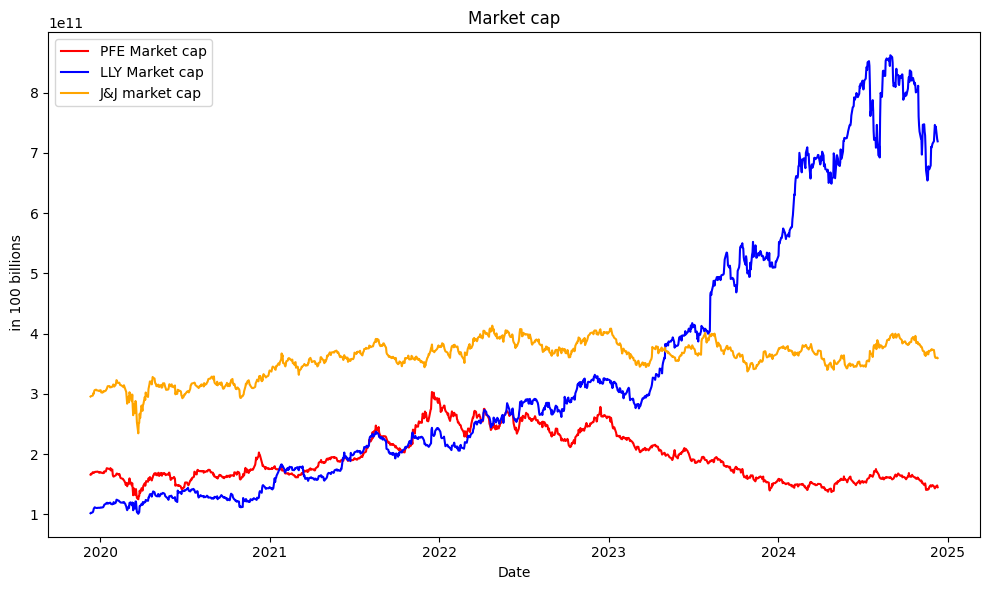

In [417]:
plt.figure(figsize=(10, 6))
plt.plot(p.index, p['Market_Cap'], label='PFE Market cap', color='red')
plt.plot(l.index, l['Market_Cap'], label='LLY Market cap', color='blue')
plt.plot(j.index, j['Market_Cap'], label='J&J market cap', color='orange')

plt.title('Market cap')
plt.xlabel('Date')
plt.ylabel(' in 100 billions')

plt.legend()

plt.tight_layout()
plt.show()

In [418]:
l['Market_Cap'].max()

861933811778.6406

<font size='4'> So Based on the market capitalization data analyzed for **Eli Lilly(LLY)** from 2020 to 2024 has the most consistent upward trajectory starting from 101 billions to peaking at 861 billion  (between 2020 and 2024).The company demonstrates a consistent and robust upward trend in its market cap over the period. This indicates strong investor confidence and a growing belief in the company’s future growth prospects.<br>
Several key factors likely contribute to this consistent upward trajectory:<br>
1.Product Innovation: Successful launches like Mounjaro (tirzepatide) for diabetes and Olumiant (baricitinib) for to treat rheumatoid arthritis have bolstered Lilly's revenue and market position.<br>
2.Strategic Focus: Eli Lilly's emphasis on high-demand areas like diabetes, oncology, and autoimmune diseases has helped sustain growth.

<font size='4'> So Based on the market capitalization data analyzed for **pfizer(PFE)** from 2020 to 2024 an upward spike during the pandemic,followed by a downward trend. The spike aligns with Pfizer critical role in developing COVID-19 vaccines,which boosted revenue and investors confidence.<br>
The subsequent decline might reflect reduced vaccine demand or market corrections as the pandemic’s urgency decreased.

In [358]:
f=j.resample('M').mean()#J&J monthly resample mean()
f['Market_Cap']

Date
2019-12-31    3.022082e+11
2020-01-31    3.087526e+11
2020-02-29    3.116188e+11
2020-03-31    2.762914e+11
2020-04-30    3.077033e+11
                  ...     
2024-08-31    3.829749e+11
2024-09-30    3.933189e+11
2024-10-31    3.867439e+11
2024-11-30    3.713547e+11
2024-12-31    3.629625e+11
Freq: M, Name: Market_Cap, Length: 61, dtype: float64

<Axes: xlabel='Date'>

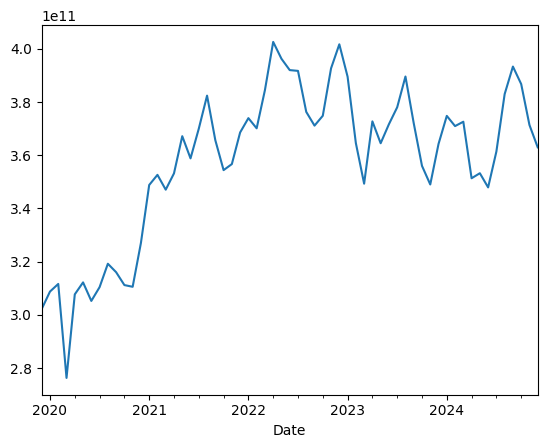

In [356]:
f['Market_Cap'].plot()

<font size='4'> So Based on the market capitalization data analyzed for **J&J(JNJ)** from 2020 to 2024 market cap was Relatively stable at 300 billion.
The stability reflects J&J diversified portfolio, with pharmaceuticals,consumer healthcare,medical devices balacing out volatility.<br>
There was also a slight decrement in market cap around March 2020(average market cap is lower then previous month) was due to the lawsuit against there healthcare products.

<h3>LIMITATION FOR ABOVE ANALYSIS:</h3>

<font size='4'> This analysis assumes a constant number of outstanding shares over the five year period,based on the latest available value form Yahoo Finance. As a result,market cap calculation may not fully reflect changes due to corporate actions such as 
stock-splits,buybacks,or new share issurances,which could introduce minor inaccuracies in the Graph presented.

<h2>Correlation</h2>

In [359]:
pfizer=df_p.copy()
jnj=df_j.copy()
lilly=df_l.copy()

In [361]:
pfizer.rename(columns=lambda x:x+'_PFE',inplace=True)

In [362]:
jnj.rename(columns=lambda x:x+'_JNJ',inplace=True)

In [364]:
lilly.rename(columns=lambda x:x+'_LLY',inplace=True)

In [368]:
result=pd.concat([pfizer,jnj,lilly],axis=1)

In [370]:
result.head(2)

,Open_PFE,High_PFE,Low_PFE,Close_PFE,Volume_PFE,Open_JNJ,High_JNJ,Low_JNJ,Close_JNJ,Volume_JNJ,Open_LLY,High_LLY,Low_LLY,Close_LLY,Volume_LLY
Date,,,,,,,,,,,,,,,
2019-12-11,29.388385,29.541570,29.258179,29.273497,15569372,122.676940,123.590948,122.415806,122.720467,6631500,112.996369,113.596217,112.452762,113.202568,3438100
2019-12-12,29.235196,29.579861,29.235196,29.518587,13414469,123.016467,123.660615,122.502873,123.033867,5012400,112.996386,114.280439,112.996386,114.064865,2959400


In [404]:
result.tail(2)

,Open_PFE,High_PFE,Low_PFE,Close_PFE,Volume_PFE,Open_JNJ,High_JNJ,Low_JNJ,Close_JNJ,Volume_JNJ,Open_LLY,High_LLY,Low_LLY,Close_LLY,Volume_LLY
Date,,,,,,,,,,,,,,,
2024-12-09,25.76,26.440001,25.58,26.10,37464800,149.289993,150.889999,148.440002,149.600006,8410300,823.700012,823.700012,801.280029,803.580017,3176000
2024-12-10,26.10,26.110001,25.51,25.57,43217900,149.929993,150.830002,148.330002,149.229996,9397800,809.270020,814.000000,797.000000,799.580017,2693000


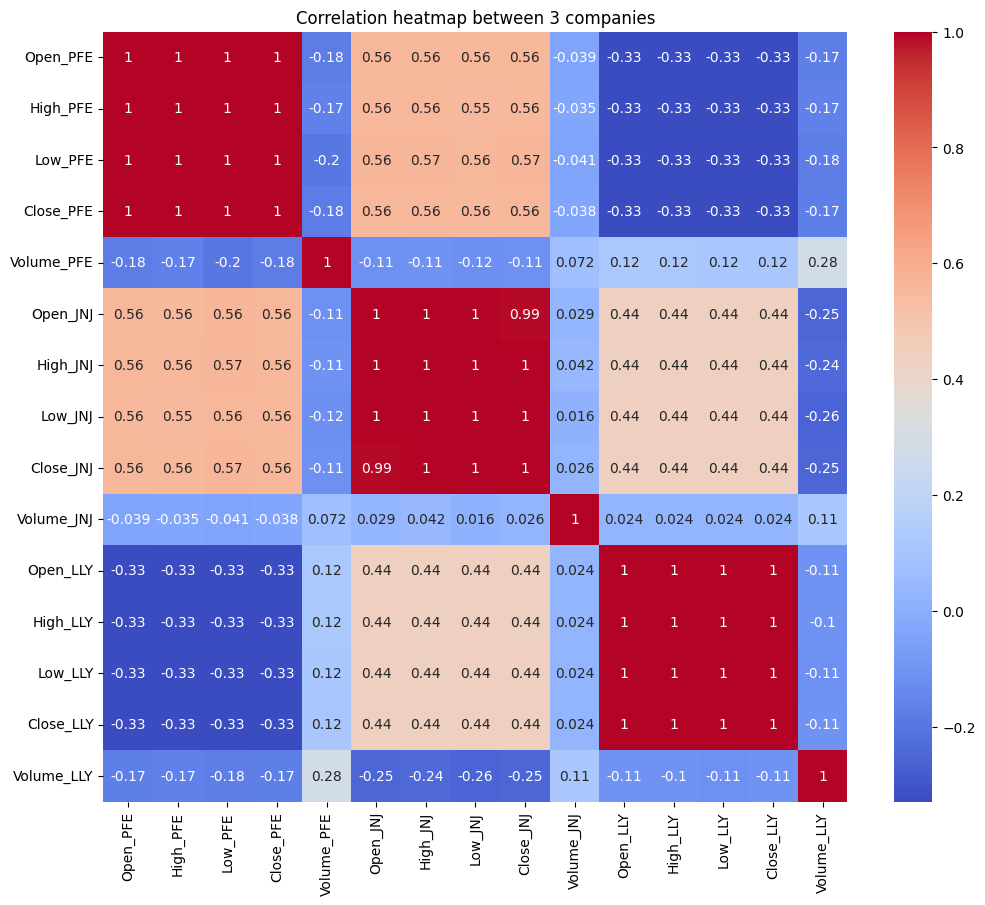

In [374]:
plt.figure(figsize=(12,10))
sns.heatmap(result.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation heatmap between 3 companies')
plt.show()

<font size='4'> By looking at heatmap we can say that there is 0.56 correlation for prices between J&J and pfizer. A Correlation of 0.56 suggests a moderate positive relationship between the two companies. This means that as one company’s stock price tends to increase, the other company’s stock price also tends to increase, but the relationship isn’t perfect.It indicates that there is some level of synchronization in their price movements, but it is not a strong or certain relationship.